Naive Bayes Accuracy: 81.00%
Confusion Matrix:
 [[77 12]
 [26 85]]


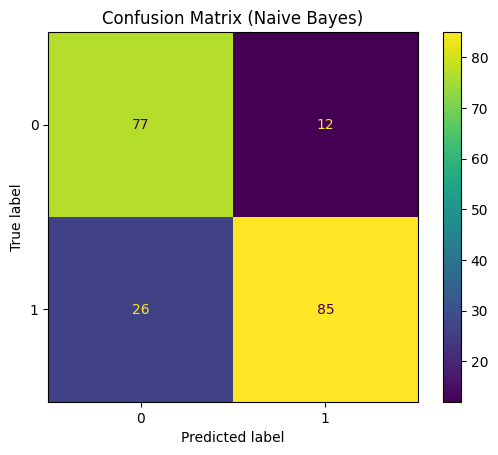

Precision: 0.876
Recall: 0.766
F1-score: 0.817

Classification Report:
               precision    recall  f1-score   support

           0      0.748     0.865     0.802        89
           1      0.876     0.766     0.817       111

    accuracy                          0.810       200
   macro avg      0.812     0.815     0.810       200
weighted avg      0.819     0.810     0.811       200

AUC: 0.887


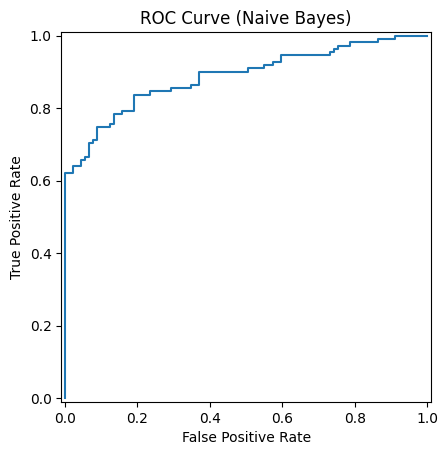

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score,
    classification_report, roc_curve, roc_auc_score, RocCurveDisplay
)
import matplotlib.pyplot as plt

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)
y_scores = nb_model.predict_proba(X_test)[:, 1]  # probability for class 1

# Metrics
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Print results
print(f'Naive Bayes Accuracy: {accuracy*100:.2f}%')
print("Confusion Matrix:\n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix (Naive Bayes)")
plt.show()

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print(f"AUC: {auc:.3f}")

# ROC Curve
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve (Naive Bayes)")
plt.show()
